## 1.1 Genetic Algorithm (GA)

Read more at URL https://en.wikipedia.org/wiki/Genetic_algorithm

In [2]:
!pip install deap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 5.1 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.11/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "



--- DEAP Implementation ---
Best Chromosome: [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
Best Fitness: 634.64


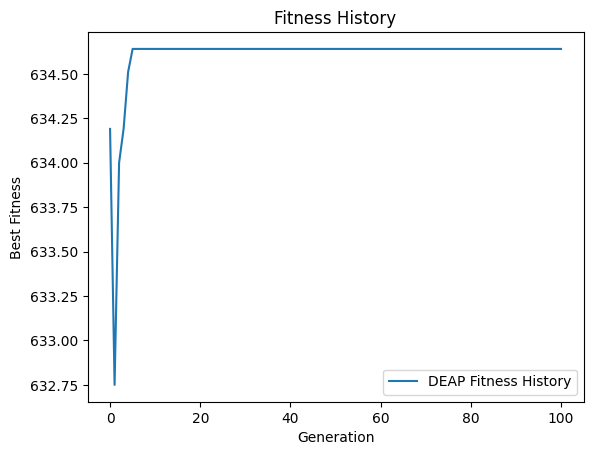


--- Raw Code Implementation ---
Best Chromosome: [0, 0, 1, 1, 1, 1, 1, 0, 1, 0]
Best Fitness: 635.0


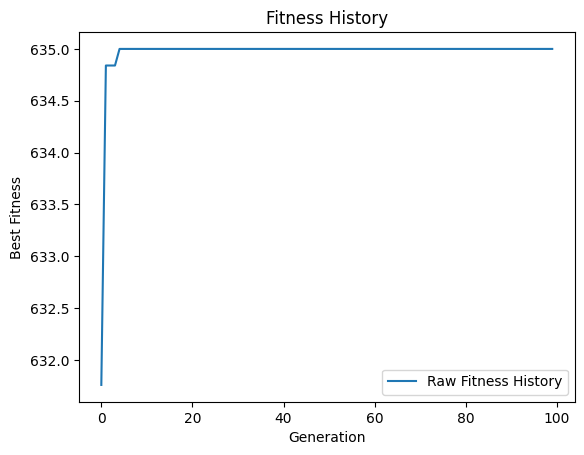

In [4]:
import random
import numpy as np
import matplotlib.pyplot as plt

# --- Common Parameters ---
POPULATION_SIZE = 50
CHROMOSOME_LENGTH = 10
GENERATIONS = 100
MUTATION_RATE = 0.1
ELITE_SIZE = 5

# --- Fitness Function (Polynomial) ---
def fitness_function(chromosome):
    decimal = int("".join(map(str, chromosome)), 2)
    return -0.01 * decimal**2 + 5 * decimal + 10

# --- i) DEAP Implementation ---
try:
    from deap import base, creator, tools, algorithms

    def deap_genetic_algorithm():
        creator.create("FitnessMax", base.Fitness, weights=(1.0,))
        creator.create("Individual", list, fitness=creator.FitnessMax)

        toolbox = base.Toolbox()
        toolbox.register("attribute", random.randint, 0, 1)
        toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attribute, n=CHROMOSOME_LENGTH)
        toolbox.register("population", tools.initRepeat, list, toolbox.individual)

        toolbox.register("evaluate", lambda individual: (fitness_function(individual),))
        toolbox.register("mate", tools.cxTwoPoint)
        toolbox.register("mutate", tools.mutUniformInt, low=0, up=1, indpb=MUTATION_RATE)
        toolbox.register("select", tools.selTournament, tournsize=3)

        population = toolbox.population(n=POPULATION_SIZE)
        hof = tools.HallOfFame(1)
        stats = tools.Statistics(lambda ind: ind.fitness.values)
        stats.register("avg", np.mean)
        stats.register("min", np.min)
        stats.register("max", np.max)

        population, log = algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=GENERATIONS, stats=stats, halloffame=hof, verbose=False)

        best_individual = tools.selBest(population, k=1)[0]
        best_fitness = fitness_function(best_individual)
        best_fitness_history = log.select("max")

        return best_individual, best_fitness, best_fitness_history

    deap_best_chromosome, deap_best_fitness, deap_fitness_history = deap_genetic_algorithm()

    print("\n--- DEAP Implementation ---")
    print("Best Chromosome:", deap_best_chromosome)
    print("Best Fitness:", deap_best_fitness)

    plt.plot(deap_fitness_history, label="DEAP Fitness History")
    plt.xlabel("Generation")
    plt.ylabel("Best Fitness")
    plt.title("Fitness History")
    plt.legend()
    plt.show()

except ImportError:
    print("DEAP library not found. Skipping DEAP implementation.")

# --- ii) Raw Code Implementation ---
def raw_genetic_algorithm():
    def initialize_population():
        population = []
        for _ in range(POPULATION_SIZE):
            chromosome = [random.randint(0, 1) for _ in range(CHROMOSOME_LENGTH)]
            population.append(chromosome)
        return population

    def two_point_crossover(parent1, parent2):
        crossover_point1 = random.randint(0, CHROMOSOME_LENGTH - 2)
        crossover_point2 = random.randint(crossover_point1 + 1, CHROMOSOME_LENGTH - 1)
        child1 = parent1[:crossover_point1] + parent2[crossover_point1:crossover_point2] + parent1[crossover_point2:]
        child2 = parent2[:crossover_point1] + parent1[crossover_point1:crossover_point2] + parent2[crossover_point2:]
        return child1, child2

    def uniform_mutation(chromosome):
        mutated_chromosome = chromosome[:]
        for i in range(CHROMOSOME_LENGTH):
            if random.random() < MUTATION_RATE:
                mutated_chromosome[i] = 1 - mutated_chromosome[i]
        return mutated_chromosome

    def elite_selection(population, fitness_values):
        population_with_fitness = list(zip(population, fitness_values))
        population_with_fitness.sort(key=lambda x: x[1], reverse=True)
        elites = [chromosome for chromosome, _ in population_with_fitness[:ELITE_SIZE]]
        return elites

    population = initialize_population()
    best_fitness_history = []

    for generation in range(GENERATIONS):
        fitness_values = [fitness_function(chromosome) for chromosome in population]
        best_fitness_history.append(max(fitness_values))
        elites = elite_selection(population, fitness_values)
        new_population = elites[:]
        while len(new_population) < POPULATION_SIZE:
            parent1 = random.choice(population)
            parent2 = random.choice(population)
            child1, child2 = two_point_crossover(parent1, parent2)
            child1 = uniform_mutation(child1)
            child2 = uniform_mutation(child2)
            new_population.extend([child1, child2])
        population = new_population[:POPULATION_SIZE]

    final_fitness_values = [fitness_function(chromosome) for chromosome in population]
    best_chromosome = population[np.argmax(final_fitness_values)]
    best_fitness = max(final_fitness_values)

    return best_chromosome, best_fitness, best_fitness_history

raw_best_chromosome, raw_best_fitness, raw_fitness_history = raw_genetic_algorithm()

print("\n--- Raw Code Implementation ---")
print("Best Chromosome:", raw_best_chromosome)
print("Best Fitness:", raw_best_fitness)

plt.plot(raw_fitness_history, label="Raw Fitness History")
plt.xlabel("Generation")
plt.ylabel("Best Fitness")
plt.title("Fitness History")
plt.legend()
plt.show()